## MULTIPLE LINEAR REGRESSION

### Install required libraries

In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load the dataset

In [8]:
df_index = pd.read_csv("economic_index.csv")
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


###                                 Data Cleaning

### Drop any unnecessary columns in our dataset

In [9]:
df_index.drop(columns=['Unnamed: 0', "year", "month"], axis=1, inplace=True)


In [10]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


### Check for Missing values in the dataset

In [11]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

## Data Visualization 

#### Pairplot to Visualize relationships

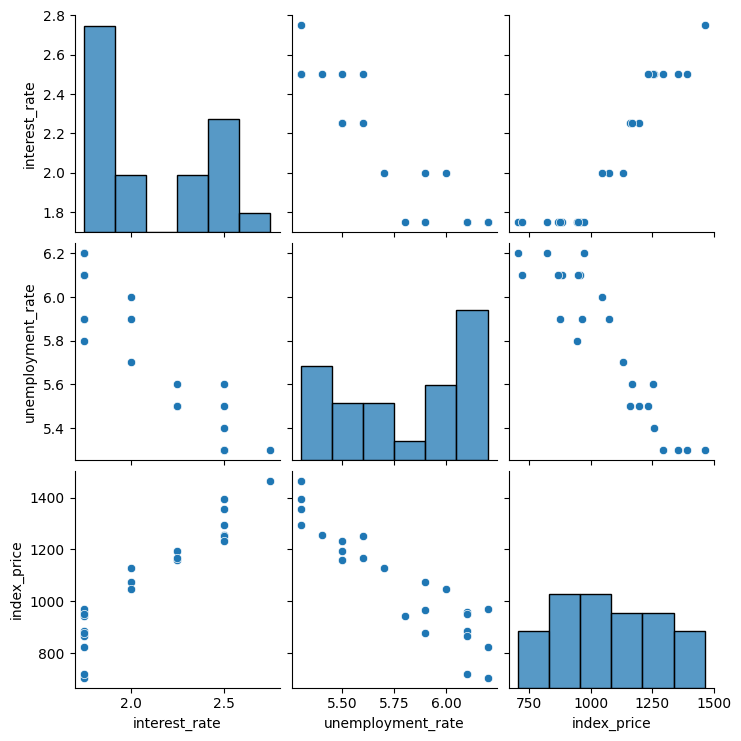

In [12]:
sns.pairplot(df_index)
plt.show()

In [15]:
# Correlation 
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


### Scatter Plot: Interest Rate vs Unemployment Rate

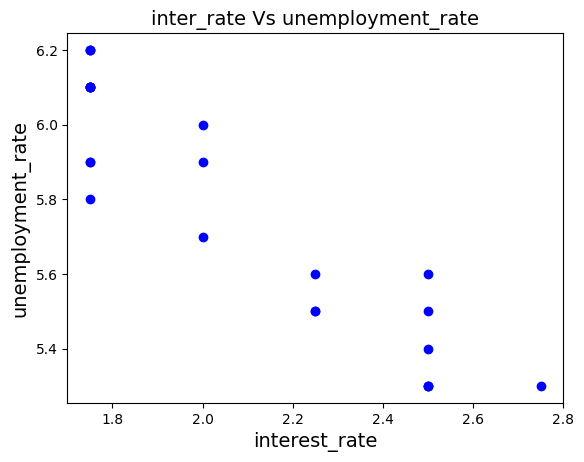

In [8]:
plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'], color = 'blue')
plt.title('inter_rate Vs unemployment_rate', fontsize=14)
plt.xlabel('interest_rate', fontsize=14)
plt.ylabel('unemployment_rate', fontsize=14)
plt.show()


## Feature Selection  

### Splitting the data into dependent and independent variables

In [22]:
X = df_index.iloc[:, :-1] 
Y = df_index.iloc[:, -1]

In [23]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [20]:
Y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

## Train Test Split

In [24]:
from sklearn.model_selection import train_test_split # type: ignore
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)

#### Additional Visulization

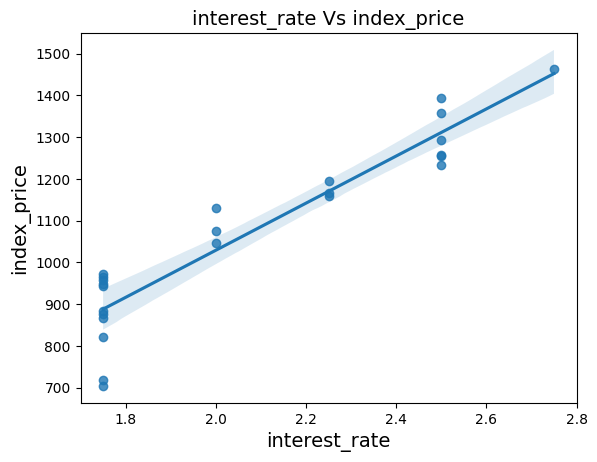

In [29]:
sns.regplot(x="interest_rate", y="index_price", data=df_index)
plt.title('interest_rate Vs index_price', fontsize=14)
plt.xlabel('interest_rate', fontsize=14)
plt.ylabel('index_price', fontsize=14)

plt.show()

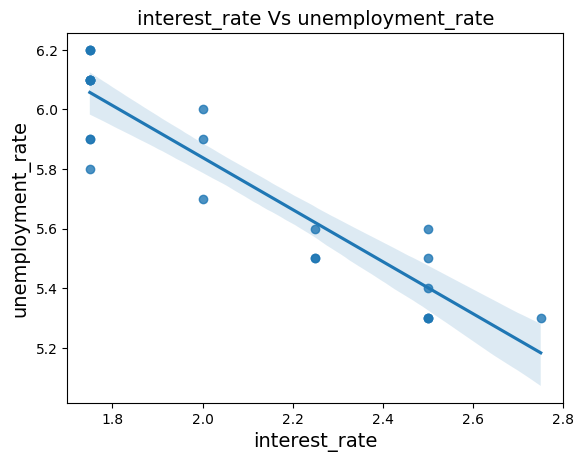

In [30]:
sns.regplot(x="interest_rate", y="unemployment_rate", data=df_index)
plt.title('interest_rate Vs unemployment_rate', fontsize=14)
plt.xlabel('interest_rate', fontsize=14)
plt.ylabel('unemployment_rate', fontsize=14)

plt.show()


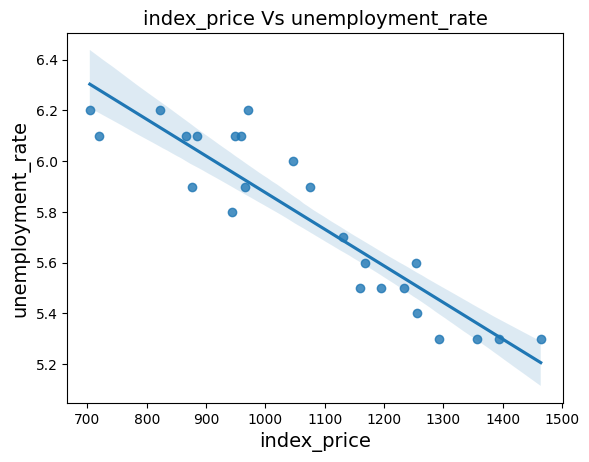

In [31]:
sns.regplot(x="index_price", y="unemployment_rate", data=df_index)
plt.title('index_price Vs unemployment_rate', fontsize=14)
plt.xlabel('index_price', fontsize=14)
plt.ylabel('unemployment_rate', fontsize=14)

plt.show()


## Data Standardization

In [35]:
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)       #Use transform instead of fit_transform for test data
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

## Model Training

In [33]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, Y_train)    

LinearRegression()

### Cross Validation

In [36]:
## Cross Validation

from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train, Y_train, scoring = 'neg_mean_squared_error', cv=3)

In [39]:
validation_score
print("Validation Scores:\n", validation_score)
print("Mean Validation Score: ", np.mean(validation_score))


Validation Scores:
 [-4921.61331265 -7686.87497294 -5135.9962549 ]
Mean Validation Score:  -5914.828180162389


### Predicition

In [40]:
y_pred = regression.predict(X_test)

In [42]:
print("Predictions:\n", y_pred)

Predictions:
 [1180.7466813   802.74279699 1379.83457045  838.52599602  973.85313963
 1144.96348227]


### Performance Metrics

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)


MSE:  8108.567426306604
MAE:  73.80444932337097
RMSE:  90.04758423359621


In [44]:
# R2 Score
from sklearn.metrics import r2_score
score = r2_score(Y_test, y_pred)
print("R2 Score: ", score)

# Display adjusted R2
print("Adjusted R2 Score: ",1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))

R2 Score:  0.7591371539010257
Adjusted R2 Score:  0.5985619231683761


### Model Coefficients

In [45]:
print("Intercept: ", regression.intercept_)
print("Coefficient: ", regression.coef_)

Intercept:  1053.4444444444443
Coefficient:  [  88.27275507 -116.25716066]


### Assumptions

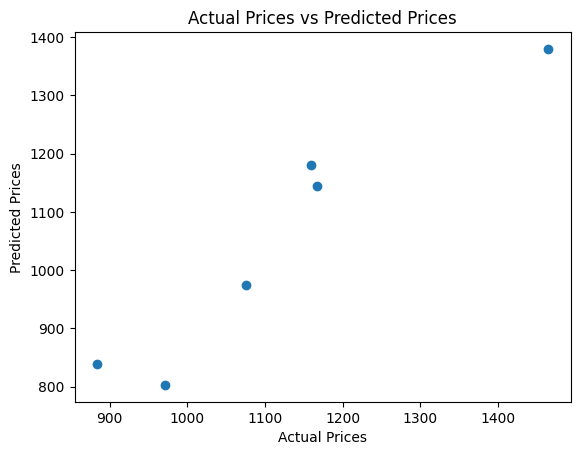

In [50]:
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")

plt.show()

### Residual Analysis


In [47]:
Residuals = Y_test - y_pred
print(Residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


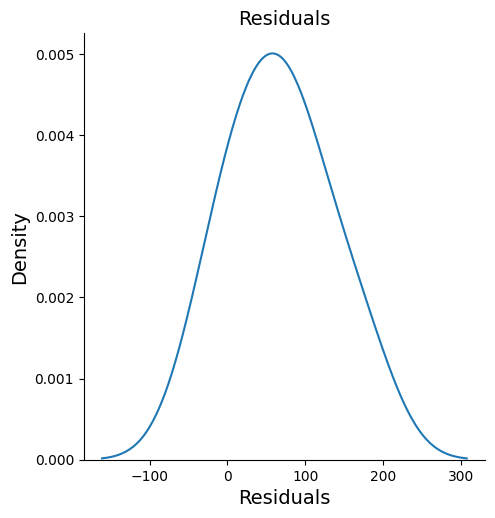

In [53]:
## Plot Residuals

sns.displot(Residuals, kind='kde')
plt.title('Residuals', fontsize=14)
plt.title('Residuals', fontsize=14)
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.show()

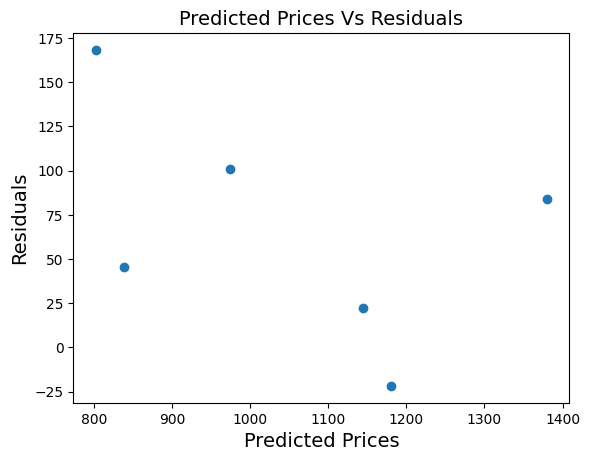

In [54]:
## Scatter plot with respect to predicition and residuals
plt.scatter(y_pred, Residuals)
plt.title('Predicted Prices Vs Residuals', fontsize=14)
plt.xlabel('Predicted Prices', fontsize=14)
plt.ylabel('Residuals', fontsize=14)

plt.show()

It is uniformly distributed, i.e doesnot follow a particular trajectory.

### OLS Linear Regression

In [55]:
import statsmodels.api as sm
model = sm.OLS(Y_train, X_train).fit()

In [56]:
model.summary()

c:\Users\arohf\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Fri, 27 Dec 2024   Prob (F-statistic):                       0.754
Time:                        06:15:02   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We have the same coefficient and intercept when we use linear regression and OLS